# Prediction of Air Quality in China 

We have a dataset of multiple features which affect the amount of pollution in air: \
dew point (the temperature at which this condensation begins to happen)\
temperature\
pressure\
wind direction\
wind speed\
snow\
rain\
They are being recorded with a sampling rate of 1 hr, for 5 years.(2010-2015)\
We use this data to predict the air pollution content for the test data.

### Importing and Preprocessing

In [2]:
# Importing the required libraries

import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("China_poluttion.csv")

In [3]:
df.head()

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [4]:
data = pd.get_dummies(df, columns = ['wnd_dir'])
print(data)

                      date  pollution  dew  temp   press  wnd_spd  snow  rain  \
0      2010-01-02 00:00:00      129.0  -16  -4.0  1020.0     1.79     0     0   
1      2010-01-02 01:00:00      148.0  -15  -4.0  1020.0     2.68     0     0   
2      2010-01-02 02:00:00      159.0  -11  -5.0  1021.0     3.57     0     0   
3      2010-01-02 03:00:00      181.0   -7  -5.0  1022.0     5.36     1     0   
4      2010-01-02 04:00:00      138.0   -7  -5.0  1022.0     6.25     2     0   
...                    ...        ...  ...   ...     ...      ...   ...   ...   
43795  2014-12-31 19:00:00        8.0  -23  -2.0  1034.0   231.97     0     0   
43796  2014-12-31 20:00:00       10.0  -22  -3.0  1034.0   237.78     0     0   
43797  2014-12-31 21:00:00       10.0  -22  -3.0  1034.0   242.70     0     0   
43798  2014-12-31 22:00:00        8.0  -22  -4.0  1034.0   246.72     0     0   
43799  2014-12-31 23:00:00       12.0  -21  -3.0  1034.0   249.85     0     0   

       wnd_dir_NE  wnd_dir_

In [5]:
data.head()

,date,pollution,dew,temp,press,wnd_spd,snow,rain,wnd_dir_NE,wnd_dir_NW,wnd_dir_SE,wnd_dir_cv
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        43800 non-null  object 
 1   pollution   43800 non-null  float64
 2   dew         43800 non-null  int64  
 3   temp        43800 non-null  float64
 4   press       43800 non-null  float64
 5   wnd_spd     43800 non-null  float64
 6   snow        43800 non-null  int64  
 7   rain        43800 non-null  int64  
 8   wnd_dir_NE  43800 non-null  uint8  
 9   wnd_dir_NW  43800 non-null  uint8  
 10  wnd_dir_SE  43800 non-null  uint8  
 11  wnd_dir_cv  43800 non-null  uint8  
dtypes: float64(4), int64(3), object(1), uint8(4)
memory usage: 2.8+ MB


In [7]:
new_data=data.set_index('date')

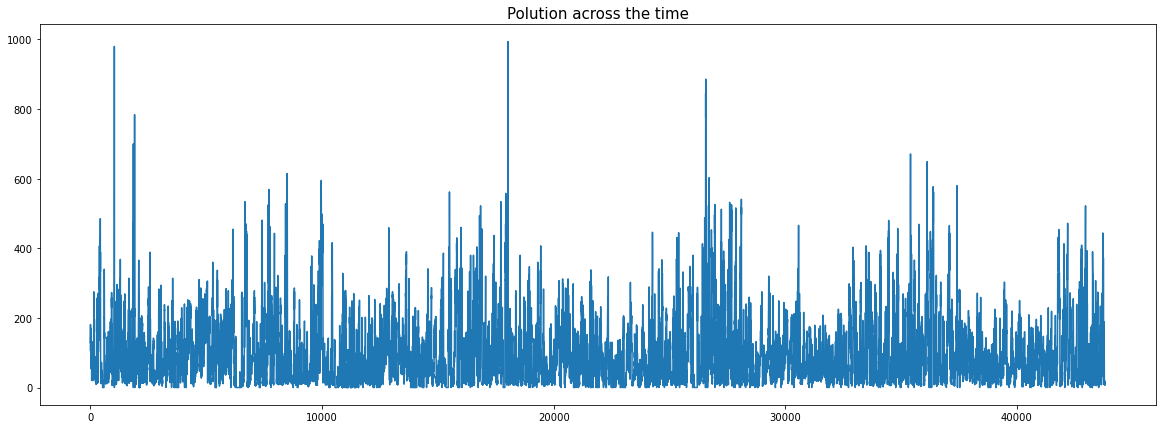

In [8]:
fig = plt.figure(figsize = (20,7))
plt.plot(df.pollution)
plt.title("Polution across the time", fontsize = 15)
plt.show()

In [8]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43800 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pollution   43800 non-null  float64
 1   dew         43800 non-null  int64  
 2   temp        43800 non-null  float64
 3   press       43800 non-null  float64
 4   wnd_spd     43800 non-null  float64
 5   snow        43800 non-null  int64  
 6   rain        43800 non-null  int64  
 7   wnd_dir_NE  43800 non-null  uint8  
 8   wnd_dir_NW  43800 non-null  uint8  
 9   wnd_dir_SE  43800 non-null  uint8  
 10  wnd_dir_cv  43800 non-null  uint8  
dtypes: float64(4), int64(3), uint8(4)
memory usage: 2.8+ MB


### LSTM Forecast

In [12]:
# Scale the data

from sklearn.preprocessing import MinMaxScaler

scaler_data = MinMaxScaler()
pol_data = scaler_data.fit_transform(new_data)
scaler_target = MinMaxScaler()
target = scaler_target.fit_transform(np.array(new_data['pollution']).reshape(-1,1))

In [13]:
#Split the data

from torch import tensor
sequence_len = 3  #history data length we consider for learning

training_size = int(len(df)*0.8)
data_train = tensor(pol_data[0:training_size]).float()
target_train = tensor(target[1:training_size+1]).float() #building a model for one-step forecasting
data_test = tensor(pol_data[training_size+1-sequence_len:-1]).float()
target_test = np.array(new_data['pollution'])[training_size+1:]

In [14]:
# Build the model:

import torch.nn as nn
from torch.optim import SGD

lstm = nn.LSTM(input_size=new_data.shape[-1], hidden_size=1, batch_first=True)
loss_function = nn.MSELoss()
optimizer = SGD(lstm.parameters(), lr=0.1)
 
epoch = 30
num_seq = len(data_train) - sequence_len
total_loss = []

In [15]:
# Train the model:

for e in range(epoch):
    epoch_loss = []
    idx = np.random.choice(np.arange(num_seq),size=num_seq,replace=False) + sequence_len
    for i in idx:
        lstm.zero_grad()

        data_in = data_train[i-sequence_len:i].unsqueeze(0)
        data_out = target_train[i-sequence_len:i]

        data_out_pred,hidden_out = lstm(data_in)

        loss = loss_function(data_out_pred.squeeze(0), data_out)
        epoch_loss.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
    
    total_loss.append(sum(epoch_loss) / len(epoch_loss))
    if np.mod(e,10)==0:
        print(total_loss[-1])

0.005048745018933437
0.000983716753154957
0.0008880606452621563


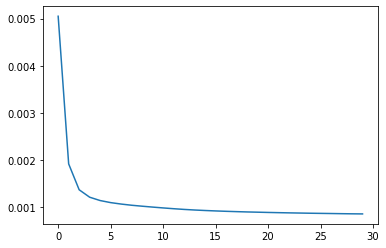

In [17]:
plt.plot(total_loss)

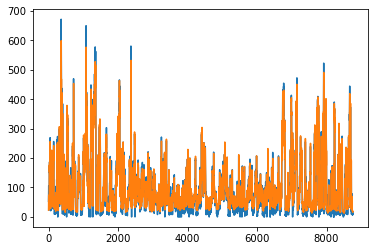

In [19]:
# Test the model:

from torch import no_grad

target_pred = []
for i,t in enumerate(target_test):
    test_in = tensor(data_test[i:i+sequence_len]).float().unsqueeze(0)
    lstm.eval()
    with no_grad():
        test_out,hidden_out = lstm(test_in)
    target_pred.append(test_out.squeeze()[-1].detach().numpy())

target_pred = scaler_target.inverse_transform(np.array(target_pred).reshape(-1,1))

plt.figure()
plt.plot(target_test)
plt.plot(target_pred)

In [22]:
target_pred

array([[25.140461],
       [35.024723],
       [40.791107],
       ...,
       [19.363182],
       [19.23845 ],
       [18.98116 ]], dtype=float32)

In [20]:
# Creating a Function for MAPE
import numpy as np
 
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

In [21]:
print(mape(target_test, target_pred))

inf


In [23]:
import sklearn
import sklearn.metrics
from sklearn.metrics import mean_squared_error
import math
mse = sklearn.metrics.mean_squared_error(target_test, target_pred)

rmse = math.sqrt(mse)
print(mse)
print(rmse)

660.1786894445337
25.69394266056756


### Conclusion:
Model has short-comings:

-the model has only one layer of lstm cell, looks like it is underfitting because the model may be too simple so we can build models with multiple layers or we can use more complex sequential networks than the vanilla LSTM

-the model is only capable of one-step forecasts